Importing the Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [29]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv(r'C:\Users\gokul\Documents\GitHub\Machine_Learning\Project8\gld_price_data.csv')

In [30]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [31]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [32]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [33]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [34]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [35]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798



Correlation:

Positive Correlation
Negative Correlation

In [36]:
non_numeric_columns = gold_data.select_dtypes(exclude=[float, int]).columns
print(non_numeric_columns)


Index(['Date'], dtype='object')


In [37]:
correlation = gold_data.select_dtypes(include=[float, int]).corr()
print(correlation)


              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

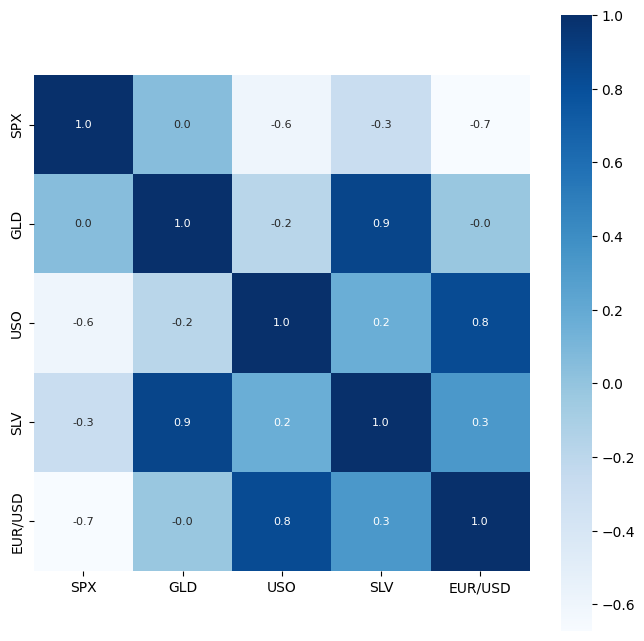

In [38]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [39]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\gokul\AppData\Local\Temp\ipykernel_21336\4061853779.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


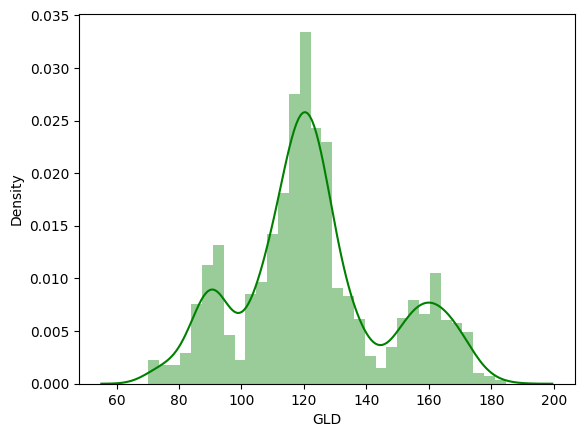

In [40]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')
plt.show()

Splitting the Features and Target

In [41]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [42]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [43]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [50]:
# Initialize the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)


In [51]:
# training the model
regressor.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

Model Evaluation

In [52]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [53]:
print(test_data_prediction)

[168.63349946  82.02709975 116.08049972 127.65620068 120.7691009
 154.80039729 150.5410983  126.21100015 117.36519882 126.01010069
 116.53350131 172.2066008  141.56769839 167.79659876 115.11799989
 117.38140041 137.96700273 170.14770114 159.01680217 157.20809863
 155.15530024 125.67850031 175.70449917 157.21900346 125.24500021
  94.0334996   77.76799986 120.42629991 119.17099966 167.39360017
  88.1694005  125.3282      91.33570078 117.69709988 121.05769906
 136.20560097 115.4369013  115.22910072 147.15919893 107.45430086
 104.55980245  87.30389785 126.44940044 118.16020018 154.01629898
 119.57100007 108.25910045 107.99379812  93.08490019 127.01759796
  74.61670067 113.76209947 121.33350028 111.23139901 118.87289907
 121.0557994  158.82800087 169.01580109 147.11659745  85.78329853
  94.33990046  86.94539902  90.42880025 119.0410007  126.53170082
 127.52419979 169.65669948 122.36049944 117.43319893  98.35459997
 168.66510074 142.80049914 131.43800208 121.15350205 120.61069946
 119.770600

In [54]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.988702488354275


Compare the Actual Values and Predicted Values in a Plot

In [55]:
Y_test = list(Y_test)

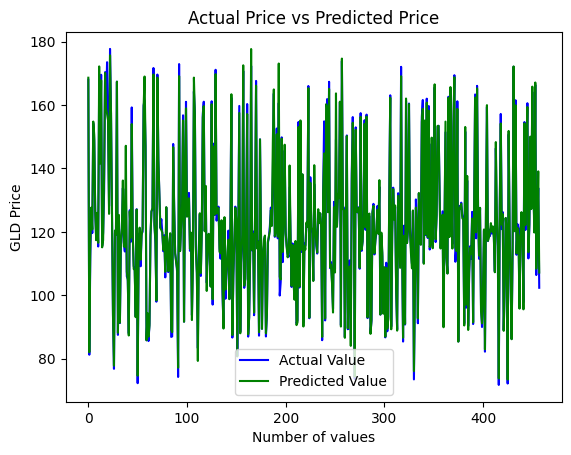

In [56]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()